лабораторная работа 6. Линейная регрессия


Цели и задачи
работы: изучение принципов
построения
информационных систем с использованием линейных методов машинного
обучения.
Основные задачи:
- освоение методологии работы с моделями линейной регресии в
задачах машинного обучения;
- освоение метдик работы с линейными моделями в python;
- освоение методики применения методов регрессии;
- изучение основных параметров регрессионных моделей.

In [ ]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import scipy
from google.colab import files
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [ ]:
uploaded = files.upload()

Saving bodyfat.csv to bodyfat.csv


In [ ]:
train_df = pd.read_csv('/content/howpop_train.csv')
test_df = pd.read_csv('/content/howpop_test.csv')
print('//////////////////////////////////////////')
print(train_df.head())
print('//////////////////////////////////////////')
print(test_df.head()) # Рис 6.2

//////////////////////////////////////////
                                url        domain  post_id  \
0  https://habrahabr.ru/post/18284/  habrahabr.ru    18284   
1  https://habrahabr.ru/post/18285/  habrahabr.ru    18285   
2  https://habrahabr.ru/post/18286/  habrahabr.ru    18286   
3  https://habrahabr.ru/post/18291/  habrahabr.ru    18291   
4  https://geektimes.ru/post/18294/  geektimes.ru    18294   

             published      author     flow  polling  content_len  \
0  2008-01-01 18:19:00      @Tapac  develop    False         4305   
1  2008-01-01 18:30:00  @DezmASter   design    False         7344   
2  2008-01-01 18:34:00  @DezmASter   design    False         8431   
3  2008-01-02 01:32:00    @Taoorus   design    False         5662   
4  2008-01-02 14:34:00    @dennydo      NaN    False         3706   

                                               title  comments  favs   views  \
0     Новогодний подарок блоггерам — WordPress 2.3.2       0.0   0.0   236.0   
1  Сумасш

In [ ]:
train_df = pd.read_csv('/content/howpop_train.csv')
test_df = pd.read_csv('/content/howpop_test.csv')
print('//////////////////////////////////////////')
print(train_df.head(1).T)
print('//////////////////////////////////////////')
print(test_df.head(1).T)

//////////////////////////////////////////
                                                               0
url                             https://habrahabr.ru/post/18284/
domain                                              habrahabr.ru
post_id                                                    18284
published                                    2008-01-01 18:19:00
author                                                    @Tapac
flow                                                     develop
polling                                                    False
content_len                                                 4305
title             Новогодний подарок блоггерам — WordPress 2.3.2
comments                                                       0
favs                                                           0
views                                                        236
votes_plus                                                   0.0
votes_minus                                    

In [ ]:
print('Тестовый набор: \t', test_df.shape)
print('Обучающая выборка: \t', train_df.shape)

Тестовый набор: 	 (3990, 9)
Обучающая выборка: 	 (134137, 17)


In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   url               134137 non-null  object 
 1   domain            134137 non-null  object 
 2   post_id           134137 non-null  int64  
 3   published         134137 non-null  object 
 4   author            97657 non-null   object 
 5   flow              97048 non-null   object 
 6   polling           134137 non-null  bool   
 7   content_len       134137 non-null  int64  
 8   title             134137 non-null  object 
 9   comments          134137 non-null  int64  
 10  favs              134137 non-null  int64  
 11  views             134137 non-null  int64  
 12  votes_plus        133566 non-null  float64
 13  votes_minus       133566 non-null  float64
 14  views_lognorm     134137 non-null  float64
 15  favs_lognorm      134137 non-null  float64
 16  comments_lognorm  13

Ряд с датами столбца published
0   2008-01-01 18:19:00
1   2008-01-01 18:30:00
2   2008-01-01 18:34:00
3   2008-01-02 01:32:00
4   2008-01-02 14:34:00
Name: published, dtype: datetime64[ns]
Размер объекта Series:  (134137, 17)


<Axes: >

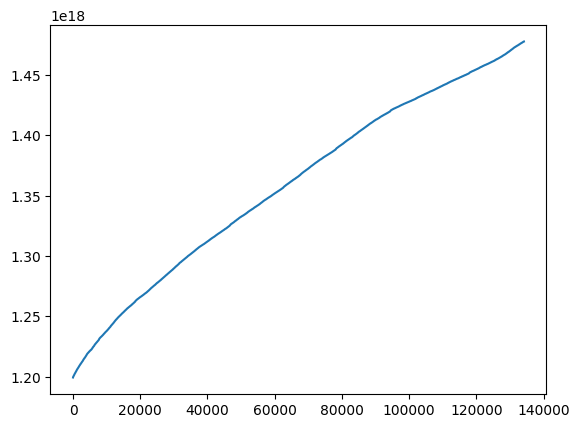

In [ ]:
# копируем столбец данных published
ser_data = train_df['published'].apply(lambda ts: pd.to_datetime(ts))
print('Ряд с датами столбца published')
print(ser_data.head())
print('Размер объекта Series: ', train_df.shape)
ser_data.apply(lambda el: el.value).plot()

In [ ]:
# Оставляем только числовые столбцы
numeric_train_df = train_df.select_dtypes(include=['number'])

# Вычисляем корреляцию
corr = numeric_train_df.corr()
corr

,post_id,content_len,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
post_id,1.000000,0.241384,-0.147763,0.089313,0.132385,-0.187885,-0.235594,-0.010376,-0.005845,-0.001605
content_len,0.241384,1.000000,-0.023544,0.308194,0.204101,0.068779,-0.078686,0.246063,0.356481,0.073132
comments,-0.147763,-0.023544,1.000000,0.164166,0.290035,0.613961,0.457638,0.349568,0.278942,0.662740
favs,0.089313,0.308194,0.164166,1.000000,0.634304,0.416241,0.062877,0.456097,0.587982,0.263239
views,0.132385,0.204101,0.290035,0.634304,1.000000,0.396849,0.128654,0.585105,0.406782,0.326427
votes_plus,-0.187885,0.068779,0.613961,0.416241,0.396849,1.000000,0.464168,0.414232,0.449712,0.525081
votes_minus,-0.235594,-0.078686,0.457638,0.062877,0.128654,0.464168,1.000000,0.146609,0.088226,0.355458
views_lognorm,-0.010376,0.246063,0.349568,0.456097,0.585105,0.414232,0.146609,1.000000,0.688811,0.546530
favs_lognorm,-0.005845,0.356481,0.278942,0.587982,0.406782,0.449712,0.088226,0.688811,1.000000,0.479476
comments_lognorm,-0.001605,0.073132,0.662740,0.263239,0.326427,0.525081,0.355458,0.546530,0.479476,1.000000


In [ ]:
corr[corr>0.9].replace({np.nan : ''})

,post_id,content_len,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
post_id,1.0,,,,,,,,,
content_len,,1.0,,,,,,,,
comments,,,1.0,,,,,,,
favs,,,,1.0,,,,,,
views,,,,,1.0,,,,,
votes_plus,,,,,,1.0,,,,
votes_minus,,,,,,,1.0,,,
views_lognorm,,,,,,,,1.0,,
favs_lognorm,,,,,,,,,1.0,
comments_lognorm,,,,,,,,,,1.0


In [ ]:
df = train_df.copy()
df['published'] = pd.to_datetime(df['published']).dt.year
ss = df['published'].value_counts()
print(ss.sort_index())

published
2008     7743
2009    10783
2010    13091
2011    15063
2012    15972
2013    15537
2014    16180
2015    23452
2016    16316
Name: count, dtype: int64


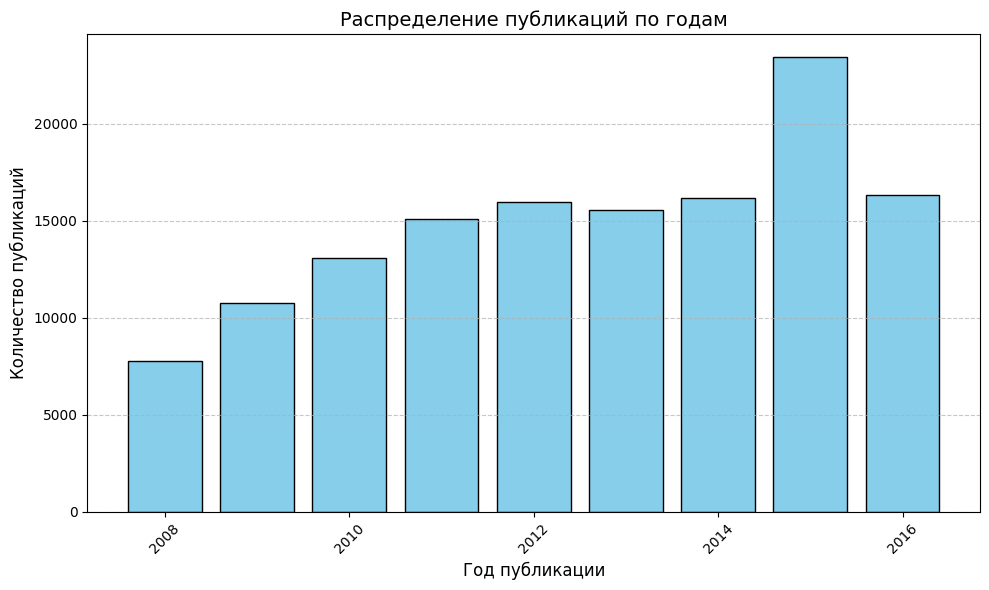

In [ ]:
# Данные для построения графика
df = train_df.copy()
df['published'] = pd.to_datetime(df['published']).dt.year  # Преобразование даты в год
ss = df['published'].value_counts()  # Подсчет количества публикаций по годам
ss = ss.sort_index()  # Сортировка по годам

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(ss.index, ss.values, color='skyblue', edgecolor='black')
plt.xlabel('Год публикации', fontsize=12)
plt.ylabel('Количество публикаций', fontsize=12)
plt.title('Распределение публикаций по годам', fontsize=14)
plt.xticks(rotation=45)  # Поворот подписей на оси X для читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Оптимизация расположения элементов графика
plt.show()

In [ ]:
features = ['author', 'flow', 'domain','title']
train_size = int(0.7 * train_df.shape[0])
print('Размер исходного набора: ', len(train_df), \
      '\nРазмер обучающей подвыборки: ', train_size)
      #отделяем признаки от целевой переменной
X, y = train_df.loc[:, features], train_df['favs_lognorm']
X_test = test_df.loc[:, features]
X_train, X_valid = X.iloc[:train_size, :], X.iloc[train_size:,:]
y_train, y_valid = y.iloc[:train_size], y.iloc[train_size:]

Размер исходного набора:  134137 
Размер обучающей подвыборки:  93895


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_title = TfidfVectorizer(min_df=3, max_df=0.3, ngram_range=(1,3))
vX_train_title = vectorizer_title.fit(X_train['title'])
print('vX_train_title.vocabulary_: ', len(vX_train_title.vocabulary_))
vX_valid_title = vectorizer_title.fit(X_valid['title'])
print('vX_train_title.vocabulary_:', len(vX_train_title.vocabulary_))
vX_test_title = vectorizer_title.fit(X_test['title'])
print('vX_train_title.vocabulary_: ', len(vX_train_title.vocabulary_))
X_train_title = vectorizer_title.fit_transform(X_train['title'])
print('X_train_title.shape: ', X_train_title.shape)
X_valid_title = vectorizer_title.transform(X_valid['title'])
print('X_valid_title.shape: ', X_valid_title.shape)
X_test_title = vectorizer_title.transform(X_test['title'])
print('X_test_title.shape: ', X_test_title.shape)

vX_train_title.vocabulary_:  50624
vX_train_title.vocabulary_: 28528
vX_train_title.vocabulary_:  2768
X_train_title.shape:  (93895, 50624)
X_valid_title.shape:  (40242, 50624)
X_test_title.shape:  (3990, 50624)


In [ ]:
vectorizer_title.vocabulary_

{'новогодний': 31497,
 'подарок': 36257,
 'блоггерам': 14241,
 'wordpress': 12172,
 'новогодний подарок': 31499,
 'сумасшедшие': 45476,
 'яйца': 50489,
 'или': 22661,
 'сервис': 42745,
 'для': 18811,
 'отслеживания': 34225,
 'посетителей': 37373,
 'или сервис': 22833,
 'сервис для': 42751,
 'для отслеживания': 19413,
 'или сервис для': 22834,
 'сервис для отслеживания': 42753,
 'сглаживание': 42460,
 'шрифтов': 49862,
 'отрисовка': 34214,
 'сглаживание шрифтов': 42461,
 'почему': 37632,
 'мне': 28231,
 'не': 30755,
 'нравится': 31925,
 'iphone': 5951,
 'почему мне': 37659,
 'мне не': 28233,
 'не нравится': 30851,
 'всеобщая': 16456,
 'доступность': 20285,
 'действии': 18272,
 'чем': 49165,
 'суть': 45504,
 'проекта': 39310,
 'ru': 9541,
 'search': 9842,
 'запускается': 21584,
 'понедельник': 37201,
 'mobile': 7315,
 'выбор': 16759,
 'способа': 44575,
 'связи': 42437,
 'обзор': 32095,
 'под': 36147,
 'windows': 11973,
 'под windows': 36185,
 'онлайн': 33063,
 'банкинг': 13661,
 'оформле

In [ ]:
vectorizer_title_ch = TfidfVectorizer(analyzer='char')

vX_train_title_ch = vectorizer_title_ch.fit(X_train['title'])
print('vX_train_title_ch.vocabulary_: ', len(vX_train_title_ch.vocabulary_))
vX_valid_title_ch = vectorizer_title_ch.fit(X_valid['title'])
print('vX_valid_title_ch.vocabulary_: ', len(vX_valid_title_ch.vocabulary_))
vX_test_title_ch = vectorizer_title_ch.fit(X_test['title'])
print('vX_test_title_ch.vocabulary_:', len(vX_test_title_ch.vocabulary_))
X_train_title_ch = vectorizer_title_ch.fit_transform(X_train['title'])
print('X_train_title_ch.shape: ', X_train_title_ch.shape)
X_valid_title_ch = vectorizer_title_ch.transform(X_valid['title'])
print('X_valid_title_ch.shape: ', X_valid_title_ch.shape)
X_test_title_ch = vectorizer_title_ch.transform(X_test['title'])
print('X_test_title_ch.shape: ', X_test_title_ch.shape)

vX_train_title_ch.vocabulary_:  218
vX_valid_title_ch.vocabulary_:  165
vX_test_title_ch.vocabulary_: 136
X_train_title_ch.shape:  (93895, 218)
X_valid_title_ch.shape:  (40242, 218)
X_test_title_ch.shape:  (3990, 218)


In [ ]:
from sklearn.feature_extraction import DictVectorizer
feats = ['author', 'flow', 'domain', 'title']
vectorizer_feats = DictVectorizer()

tmp_dict_train = X_train[feats].fillna('-').T.to_dict().values()
tmp_dict_valid = X_valid[feats].fillna('-').T.to_dict().values()
tmp_dict_test = X_test[feats].fillna('-').T.to_dict().values()

In [ ]:
X_train_feats = vectorizer_feats.fit_transform(tmp_dict_train)
X_valid_feats = vectorizer_feats.transform(tmp_dict_valid)
X_test_feats = vectorizer_feats.transform(tmp_dict_test)
print(X_train_feats.shape)
print(X_valid_feats.shape)
print(X_test_feats.shape)

(93895, 111482)
(40242, 111482)
(3990, 111482)


In [ ]:
# объединение матриц, построенных на предыдущих этапах
X_train_new = scipy.sparse.hstack([X_train_title,\
                                   X_train_feats,\
                                   X_train_title_ch])
X_valid_new = scipy.sparse.hstack([X_valid_title,\
                                   X_valid_feats,\
                                   X_valid_title_ch])
X_test_new = scipy.sparse.hstack([X_test_title,\
                                  X_test_feats,\
                                  X_test_title_ch])
print(X_train_new.shape)
print(X_valid_new.shape)
print(X_test_new.shape)

(93895, 162324)
(40242, 162324)
(3990, 162324)


In [ ]:
%%time
model_1 = Ridge(alpha=.1, random_state=1)
model_1.fit(X_train_new, y_train)

CPU times: user 21.9 s, sys: 15.3 s, total: 37.2 s
Wall time: 34.5 s


Ridge(alpha=0.1, random_state=1)

In [ ]:
train_preds1 = model_1.predict(X_train_new)
valid_preds1 = model_1.predict(X_valid_new)
print('Ошибка на трейне: ', mean_squared_error(y_train, train_preds1))
print('Ошибка на тесте: ', mean_squared_error(y_valid, valid_preds1))

Ошибка на трейне:  0.0033498668127804505
Ошибка на тесте:  0.6982987113454213


In [ ]:
%%time
model_2 = Ridge(alpha=1.0, random_state=1)
model_2.fit(X_train_new, y_train)

CPU times: user 7.56 s, sys: 5.42 s, total: 13 s
Wall time: 8.12 s


Ridge(random_state=1)

In [ ]:
train_preds2 = model_2.predict(X_train_new)
valid_preds2 = model_2.predict(X_valid_new)
print('Ошибка на трейне: ', mean_squared_error(y_train, train_preds2))
print('Ошибка на тесте: ', mean_squared_error(y_valid, valid_preds2))

Ошибка на трейне:  0.08633264425668048
Ошибка на тесте:  0.6840061221431166


Индивидуальное задание

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('/content/bodyfat.csv')
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
# Целевая переменная: мы классифицируем "процент жира в организме" на две категории (высокий и низкий)
#  высокий >= 25, низкий < 25
data['HighBodyFat'] = (data['BodyFat'] >= 25).astype(int)

# Определение признаков и целевой переменной
X = data.drop(columns=['BodyFat', 'HighBodyFat'])
y = data['HighBodyFat']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

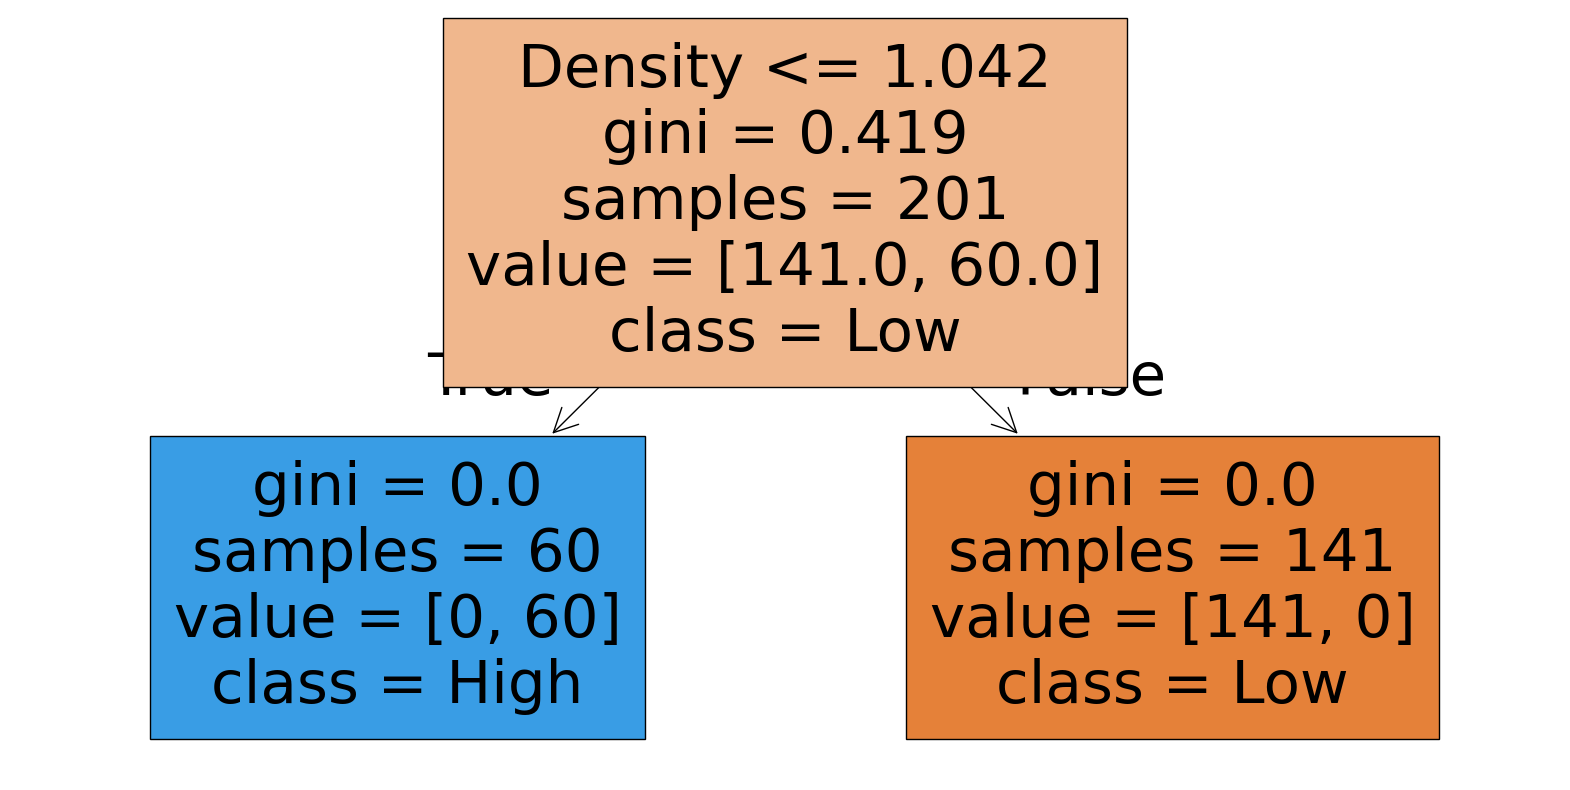

In [ ]:
#  Построение дерева решений
clf = DecisionTreeClassifier(max_depth=5, max_features=5, random_state=42)
clf.fit(X_train, y_train)

# Визуализация дерева решений
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=["Low", "High"], filled=True)
plt.savefig("bodyfat_decision_tree.png")
plt.show()

Вывод:
Разбиение по признаку Density полностью разделяет данные на два чистых узла:

Если Density <= 1.042, все объекты относятся к классу High.
Если Density > 1.042, все объекты относятся к классу Low.
Глубина дерева = 1:

Дерево получилось очень простым, потому что один признак (Density) оказался достаточно информативным для разделения классов.
Gini = 0.0 в листьях: Показатель Gini равен 0.0 в дочерних узлах, что говорит об их идеальной чистоте (каждый лист содержит объекты только одного класса).

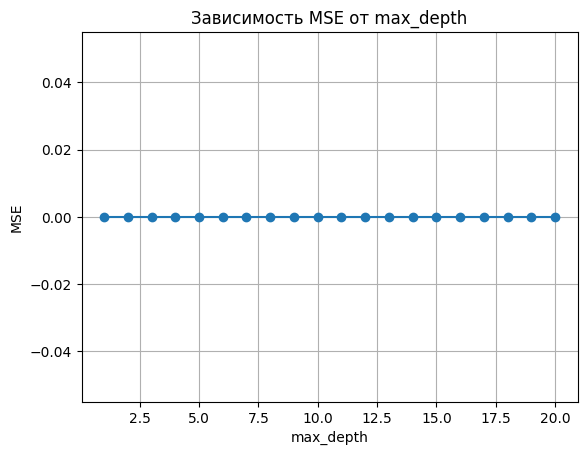

In [ ]:
# График зависимости MSE от max_depth
depths = range(1, 21)
mse_scores_depth = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    mse = -np.mean(cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    mse_scores_depth.append(mse)

plt.figure()
plt.plot(depths, mse_scores_depth, marker='o')
plt.title("Зависимость MSE от max_depth")
plt.xlabel("max_depth")
plt.ylabel("MSE")
plt.grid()
plt.show()

Значение MSE = 0 на всём диапазоне max_depth указывает на идеальное разделение данных моделью.

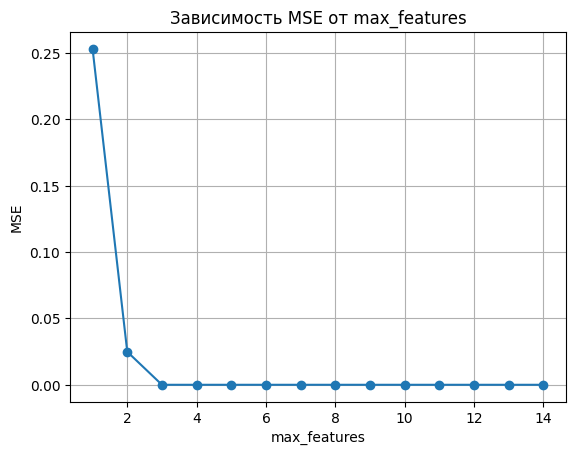

In [ ]:
#  График зависимости MSE от max_features
features = range(1, X_train.shape[1] + 1)
mse_scores_features = []

for f in features:
    clf = DecisionTreeClassifier(max_features=f, random_state=42)
    mse = -np.mean(cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    mse_scores_features.append(mse)

plt.figure()
plt.plot(features, mse_scores_features, marker='o')
plt.title("Зависимость MSE от max_features")
plt.xlabel("max_features")
plt.ylabel("MSE")
plt.grid()
plt.show()


Оптимальное количество признаков (max_features) — 3: именно при этом значении ошибка падает до 0 и больше не меняется.

In [ ]:
#  Поиск оптимальных значений max_depth и max_features
optimal_depth = depths[np.argmin(mse_scores_depth)]
optimal_features = features[np.argmin(mse_scores_features)]

print(f"Оптимальная глубина дерева: {optimal_depth}")
print(f"Оптимальное число признаков: {optimal_features}")

Оптимальная глубина дерева: 1
Оптимальное число признаков: 3


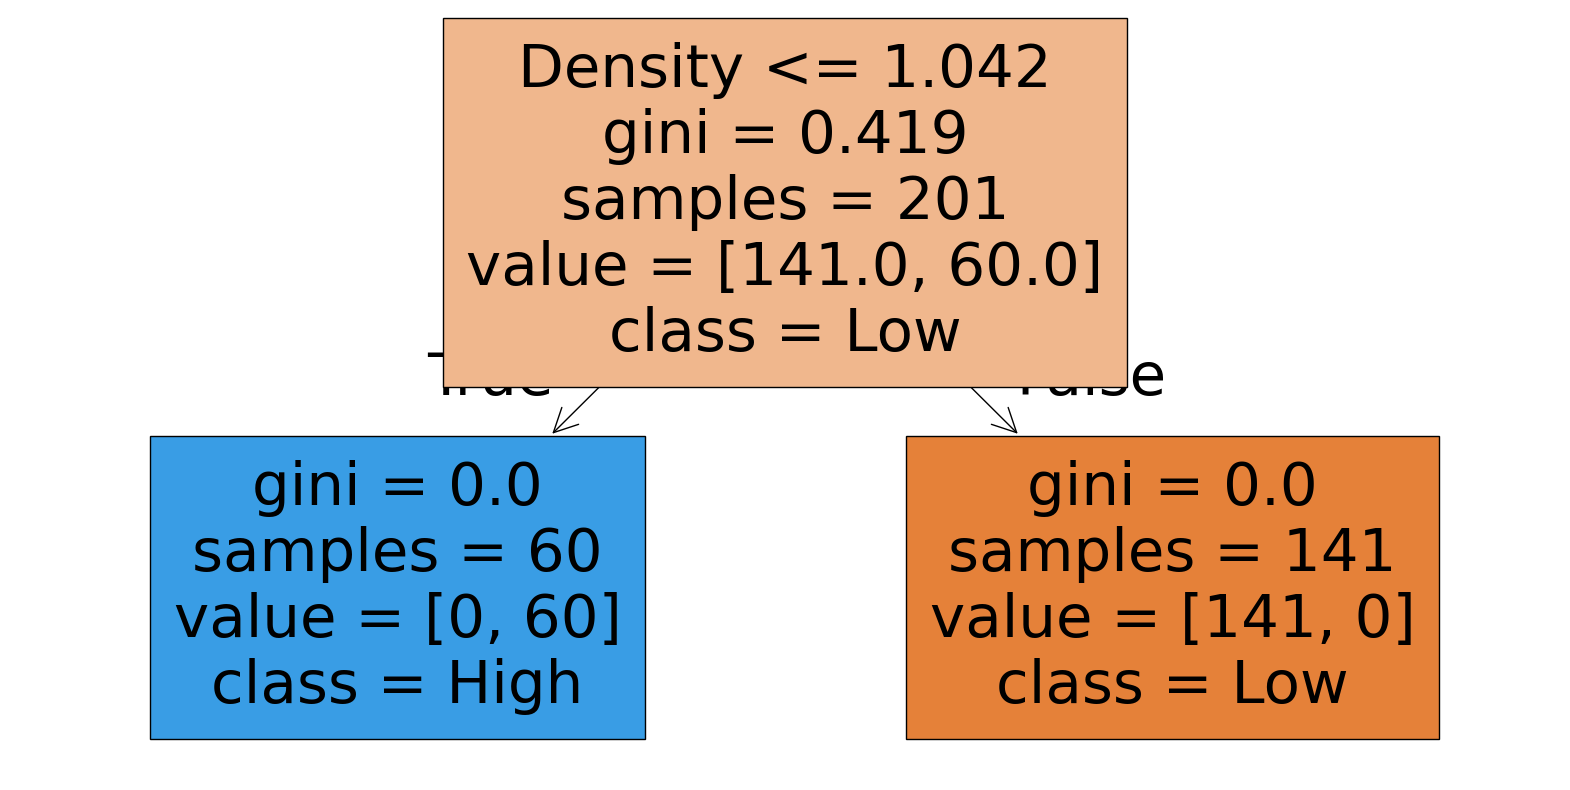

In [ ]:
# Построение финального дерева
final_clf = DecisionTreeClassifier(max_depth=optimal_depth, max_features=optimal_features, random_state=42)
final_clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(final_clf, feature_names=X.columns, class_names=["Low", "High"], filled=True)
plt.savefig("final_bodyfat_tree.png")
plt.show()

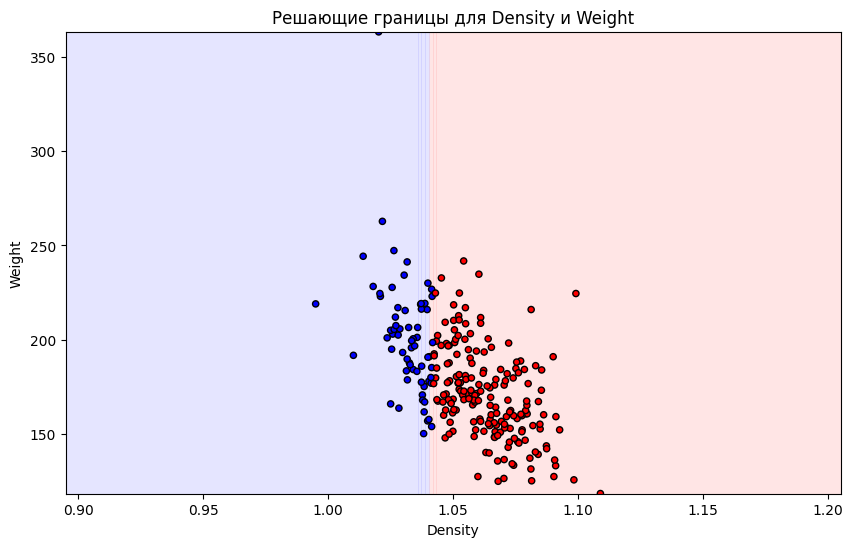

In [ ]:
from matplotlib.colors import ListedColormap
# Выделяем два признака: Density и Weight
X = data[['Density', 'Weight']].values  # Матрица признаков
y = data['HighBodyFat'].values          # Целевая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение дерева решений
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Создаем сетку для построения решающих границ
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1  # Диапазон для Density
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1  # Диапазон для Weight

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Предсказание для каждой точки на сетке
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Визуализация решающих границ
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])  # Цвета для классов
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])   # Цвета для точек

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

plt.xlabel('Density')
plt.ylabel('Weight')
plt.title('Решающие границы для Density и Weight')
plt.show()

Вывод:
Дерево решений успешно решает задачу бинарной классификации на данных BodyFat.
Оптимальная глубина дерева (max_depth) — 1. Простая модель уже классифицирует данные.
Оптимальное количество признаков (max_features) — 3. Добавление новых признаков не даёт улучшений.
Основные признаки:
Главный признак для разделения классов — Density (плотность тела).
Модель достигла нулевой ошибки (MSE = 0), что говорит об идеальном разделении данных.
